In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [4]:
# Basic checks of the dataset

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

In [6]:
data.shape

(614, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
for i in data.columns:
    print(f" {i} = {data[i].nunique()}")

 Loan_ID = 614
 Gender = 2
 Married = 2
 Dependents = 4
 Education = 2
 Self_Employed = 2
 ApplicantIncome = 505
 CoapplicantIncome = 287
 LoanAmount = 203
 Loan_Amount_Term = 10
 Credit_History = 2
 Property_Area = 3
 Loan_Status = 2


In [10]:
# Loan ID is unique for all. So dropping from dataset

In [11]:
data = data.drop(columns = 'Loan_ID',axis = 1)

In [12]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
for i in data.columns:
    print(f" {i} = {data[i].unique()}")

 Gender = ['Male' 'Female' nan]
 Married = ['No' 'Yes' nan]
 Dependents = ['0' '1' '2' '3+' nan]
 Education = ['Graduate' 'Not Graduate']
 Self_Employed = ['No' 'Yes' nan]
 ApplicantIncome = [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860
  6277

In [14]:
con = []
cat = []
for i in data.columns:
    if data[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)

In [15]:
cat,con

(['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area',
  'Loan_Status'],
 ['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History'])

In [16]:
data_cat = data[cat]
data_con = data[con]

In [17]:
data_cat.shape

(614, 7)

In [18]:
data_con.shape

(614, 5)

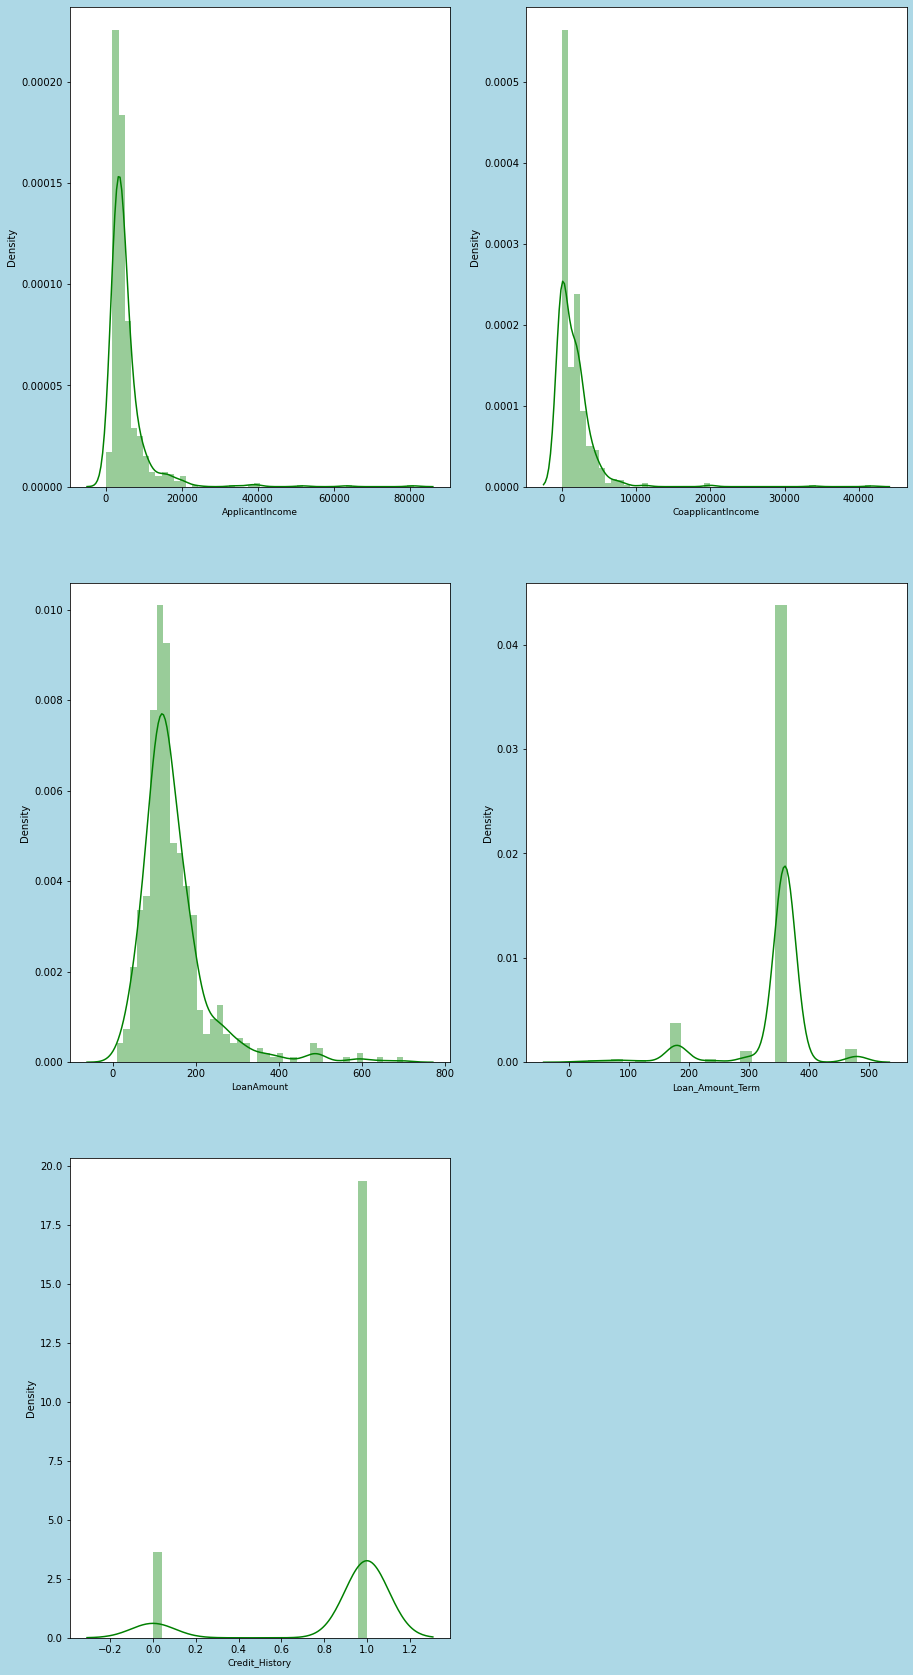

In [19]:
plt.figure(figsize=(15,30),facecolor='lightblue')
plotnumber = 1


for column in data_con:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(data_con[column],color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

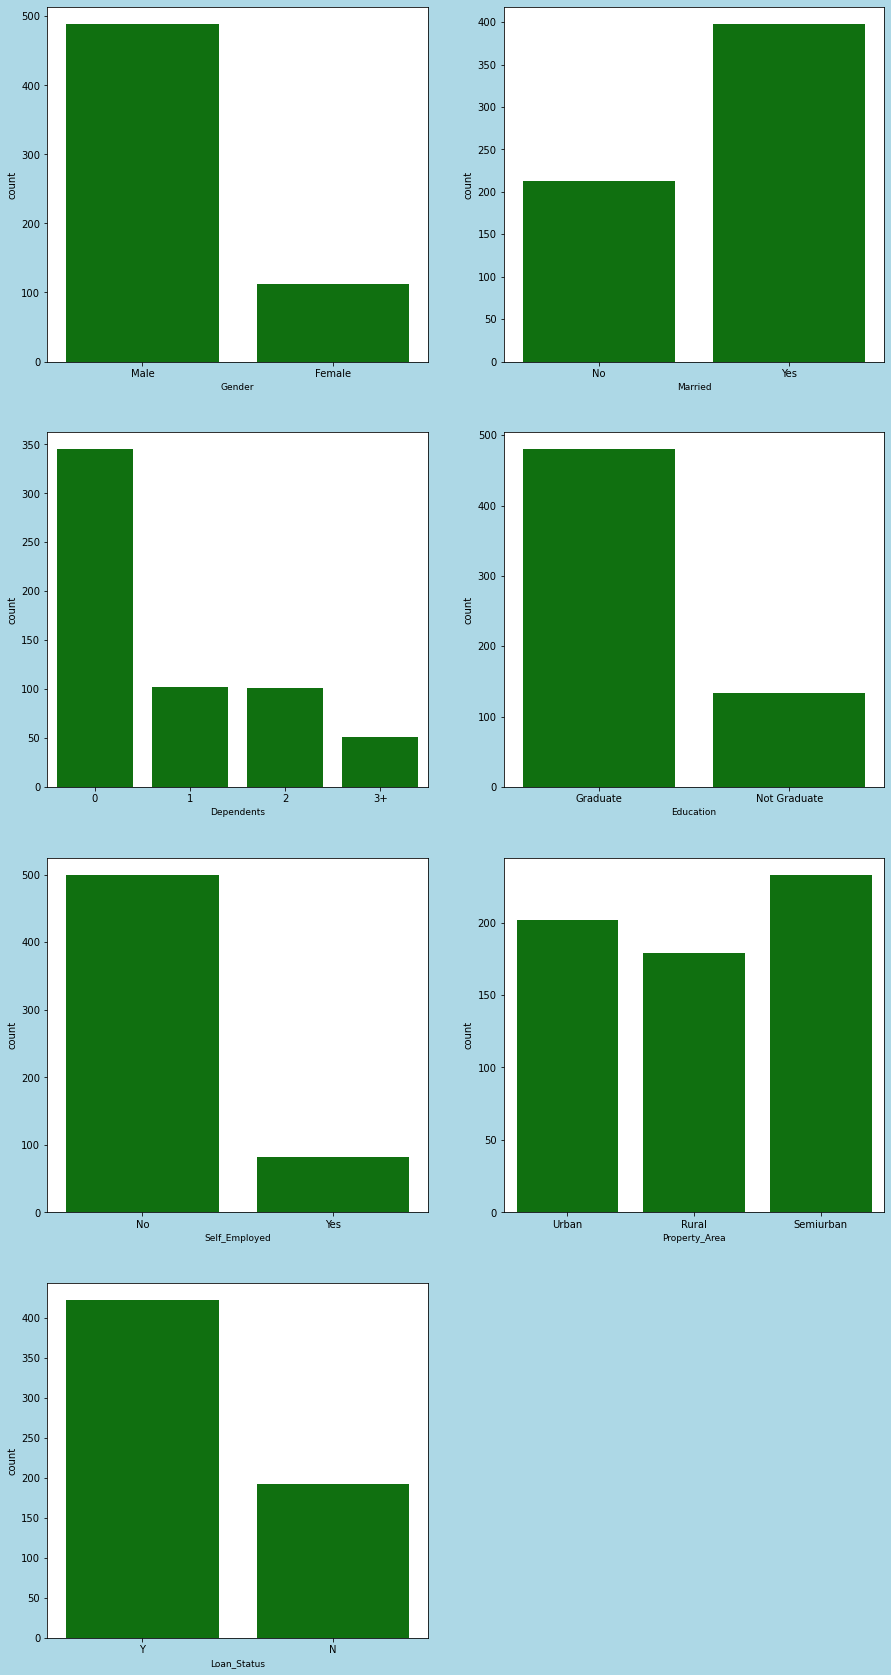

In [20]:
plt.figure(figsize=(15,30),facecolor='lightblue')
plotnumber = 1


for column in data_cat:
    if plotnumber<=7:
        ax=plt.subplot(4,2,plotnumber)
        sns.countplot(data_cat[column],color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

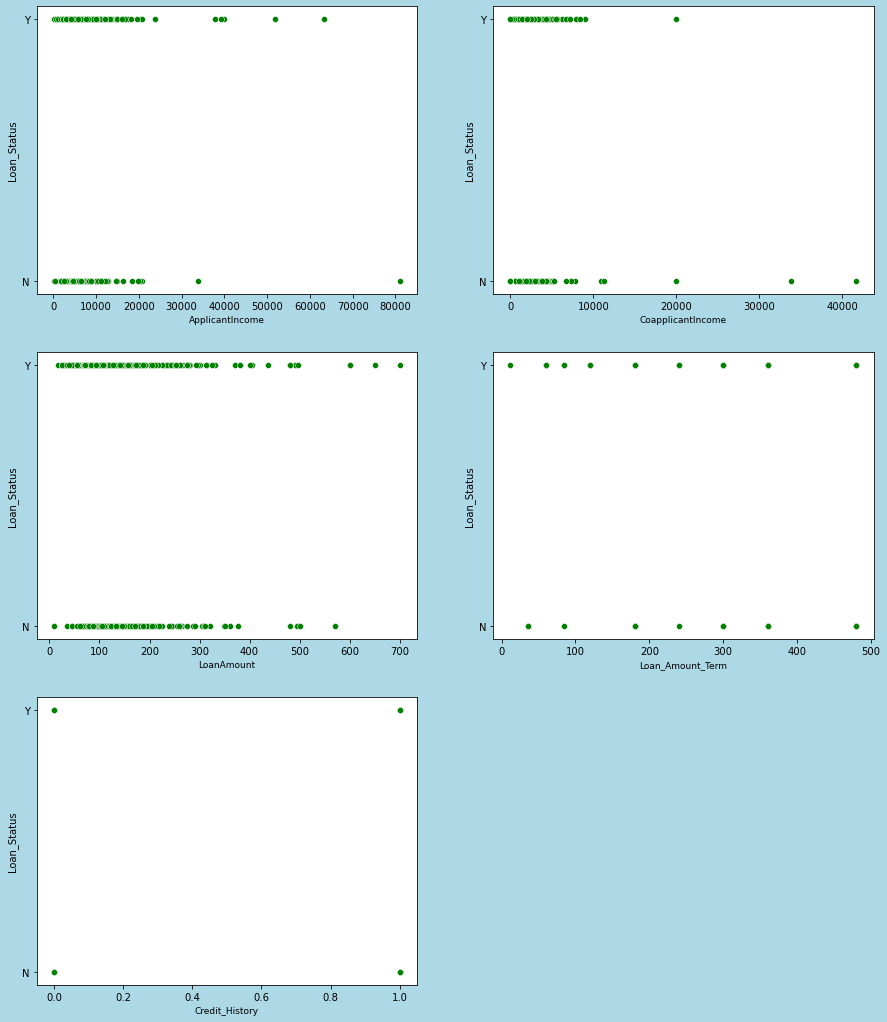

In [21]:
plt.figure(figsize=(15,18),facecolor='lightblue')
plotnumber = 1


for column in data_con:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.scatterplot(data_con[column],data['Loan_Status'],color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

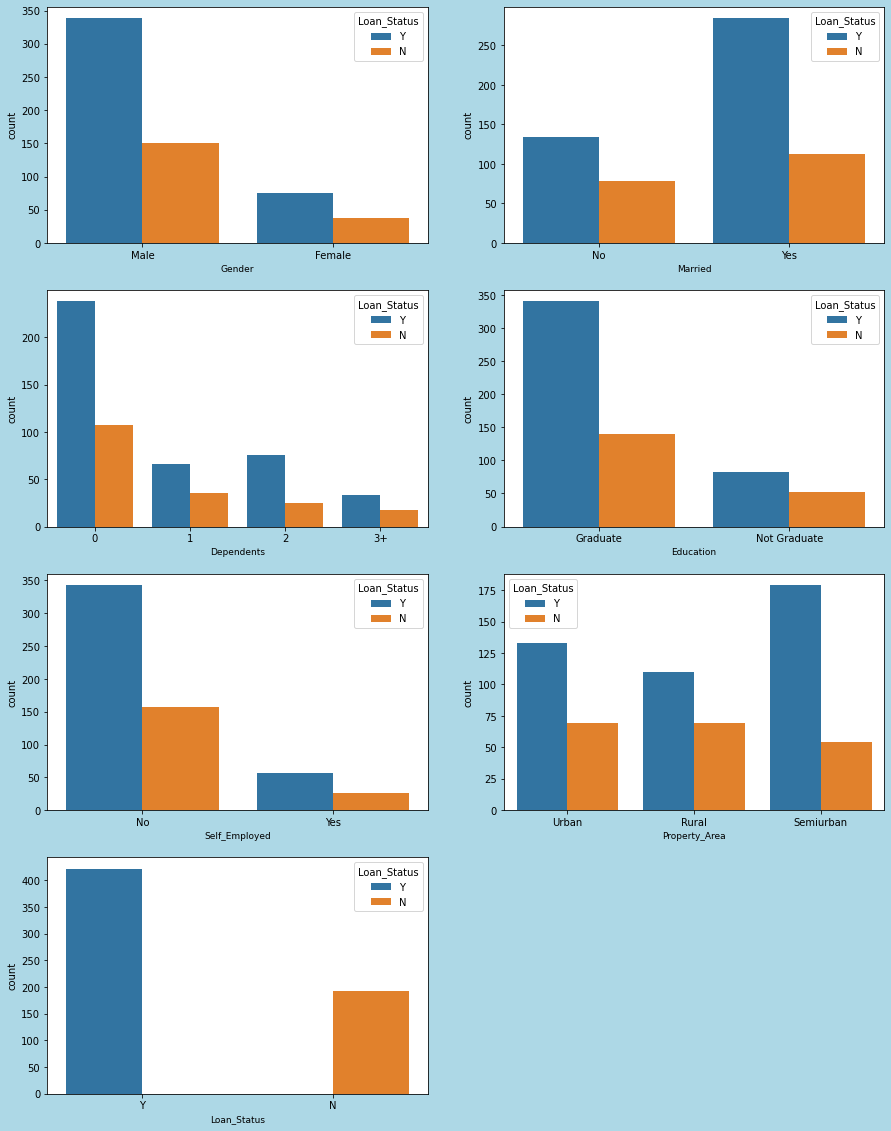

In [22]:
plt.figure(figsize=(15,20),facecolor='lightblue')
plotnumber = 1


for column in data_cat:
    if plotnumber<=7:
        ax=plt.subplot(4,2,plotnumber)
        sns.countplot(data_cat[column],hue = data['Loan_Status'])
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

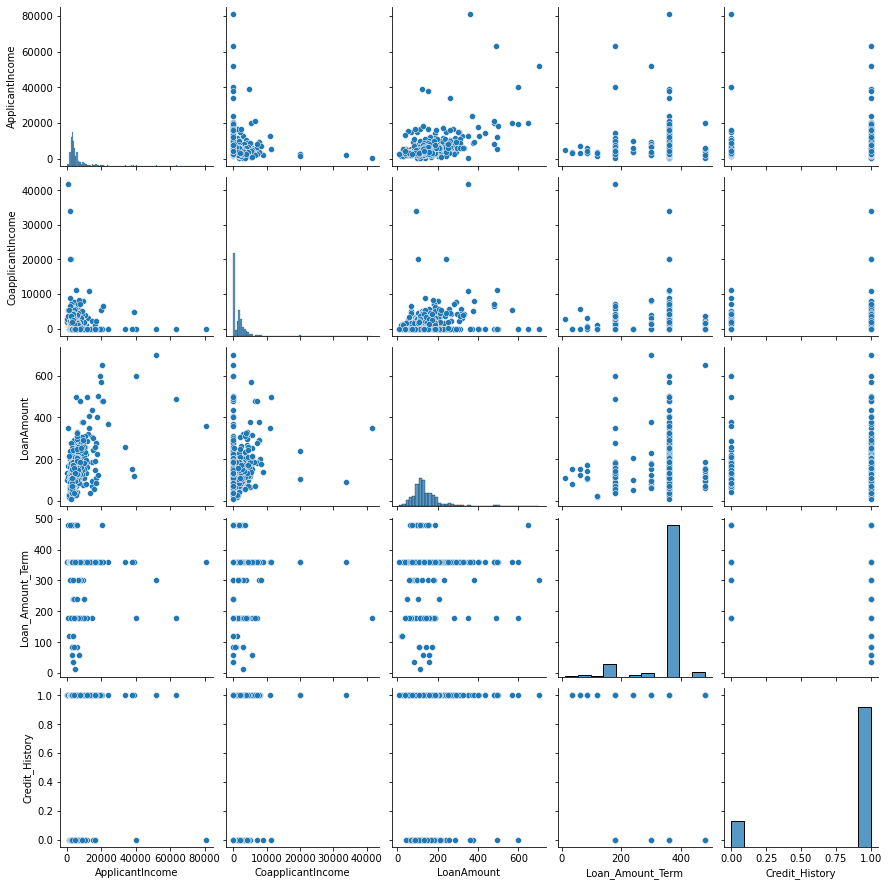

In [23]:
sns.pairplot(data)

# Data Preprocessing

In [24]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace = True)
data['Married'].fillna(data['Married'].mode()[0],inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace = True)
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0],inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace = True)

In [26]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
for i in data.columns:
    print(f" {i} = {data[i].unique()}")

 Gender = ['Male' 'Female']
 Married = ['No' 'Yes']
 Dependents = ['0' '1' '2' '3+']
 Education = ['Graduate' 'Not Graduate']
 Self_Employed = ['No' 'Yes']
 ApplicantIncome = [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860
  6277  2577  9166  22

In [28]:
data['Dependents'] = data['Dependents'].replace('3+','3',)

In [29]:
data['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [30]:
data.shape

(614, 12)

In [31]:
from sklearn.preprocessing import OrdinalEncoder
for i in data.columns:
    if data[i].dtypes == 'object':
        enco = OrdinalEncoder(categories=[data[i].unique()])
        data[i] = enco.fit_transform(data[[i]])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 57.7 KB


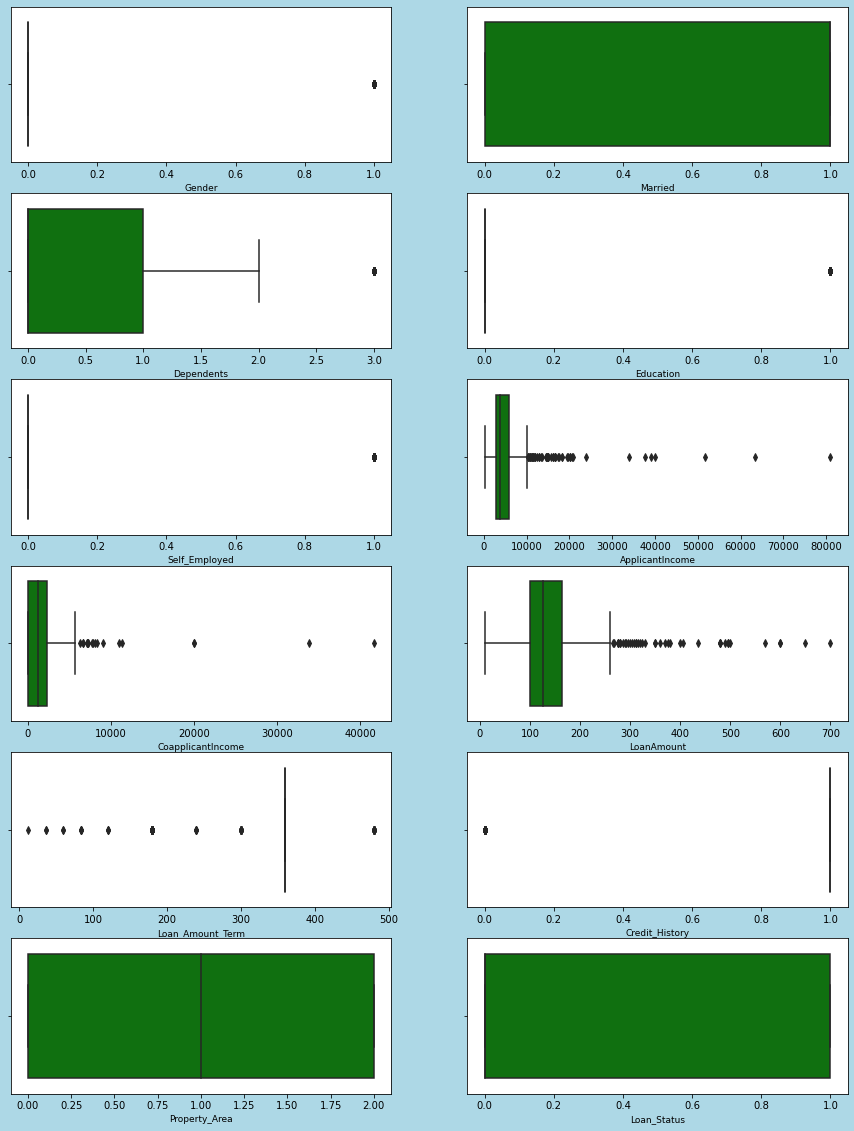

In [33]:
plt.figure(figsize=(15,20),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(data[column], color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

In [34]:
for i in data.columns:
    print(data[i].value_counts())

0.0    502
1.0    112
Name: Gender, dtype: int64
1.0    401
0.0    213
Name: Married, dtype: int64
0.0    360
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64
0.0    480
1.0    134
Name: Education, dtype: int64
0.0    532
1.0     82
Name: Self_Employed, dtype: int64
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
120.0    42
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
1.0    525


In [35]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

In [36]:
ApplicantIncome_high = q3.ApplicantIncome + (1.5 * (iqr.ApplicantIncome))
ApplicantIncome_low = q1.ApplicantIncome - (1.5 * (iqr.ApplicantIncome))
Drop_ApplicantIncome = np.where((data.ApplicantIncome > ApplicantIncome_high) | (data.ApplicantIncome < ApplicantIncome_low) )
Drop_ApplicantIncome
data = data.drop(data.index[Drop_ApplicantIncome])
data.shape
data.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849,0.0,120.0,360.0,1.0,0.0,0.0
1,1,0.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,1.0,1.0
2,2,0.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,0.0,0.0
3,3,0.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,609,1.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,1.0,0.0
560,610,0.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,1.0,0.0
561,611,0.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,0.0,0.0
562,612,0.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,0.0,0.0


In [37]:
data.shape

(564, 12)

In [38]:
CoapplicantIncome_high = q3.CoapplicantIncome + (1.5 * (iqr.CoapplicantIncome))
CoapplicantIncome_low = q1.CoapplicantIncome - (1.5 * (iqr.CoapplicantIncome))
Drop_CoapplicantIncome = np.where((data.CoapplicantIncome > CoapplicantIncome_high) | (data.CoapplicantIncome < CoapplicantIncome_low) )
Drop_CoapplicantIncome
data = data.drop(data.index[Drop_CoapplicantIncome])
data.shape
data.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849,0.0,120.0,360.0,1.0,0.0,0.0
1,1,0.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,1.0,1.0
2,2,0.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,0.0,0.0
3,3,0.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,609,1.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,1.0,0.0
544,610,0.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,1.0,0.0
545,611,0.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,0.0,0.0
546,612,0.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,0.0,0.0


In [39]:
LoanAmount_high = q3.LoanAmount + (1.5 * (iqr.LoanAmount))
LoanAmount_low = q1.LoanAmount - (1.5 * (iqr.LoanAmount))
Drop_LoanAmount = np.where((data.LoanAmount > LoanAmount_high) | (data.LoanAmount < LoanAmount_low) )
Drop_LoanAmount
data = data.drop(data.index[Drop_LoanAmount])
data.shape
data.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849,0.0,120.0,360.0,1.0,0.0,0.0
1,1,0.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,1.0,1.0
2,2,0.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,0.0,0.0
3,3,0.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,609,1.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,1.0,0.0
531,610,0.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,1.0,0.0
532,611,0.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,0.0,0.0
533,612,0.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,0.0,0.0


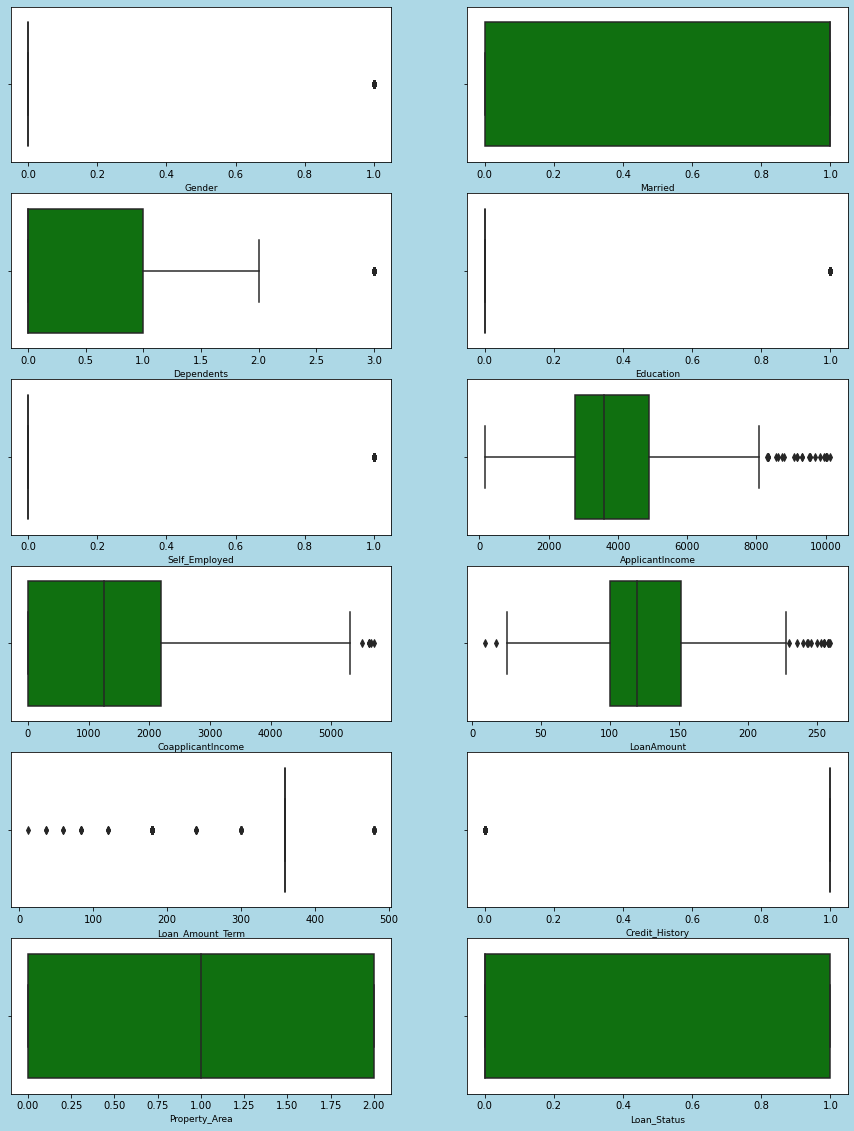

In [40]:
plt.figure(figsize=(15,20),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(data[column], color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

In [41]:
# Treating Loan_Amount_Term using Z-Score method

In [42]:
from scipy.stats import zscore
import numpy as np
z_score =zscore(data[['Loan_Amount_Term']])
scaled_z_score = np.abs(z_score)
filtering_entry =(scaled_z_score <3).all(axis=1)
data = data[filtering_entry]

In [43]:
data.shape

(523, 12)

In [44]:
# outlier have been treated

# Feature Selection

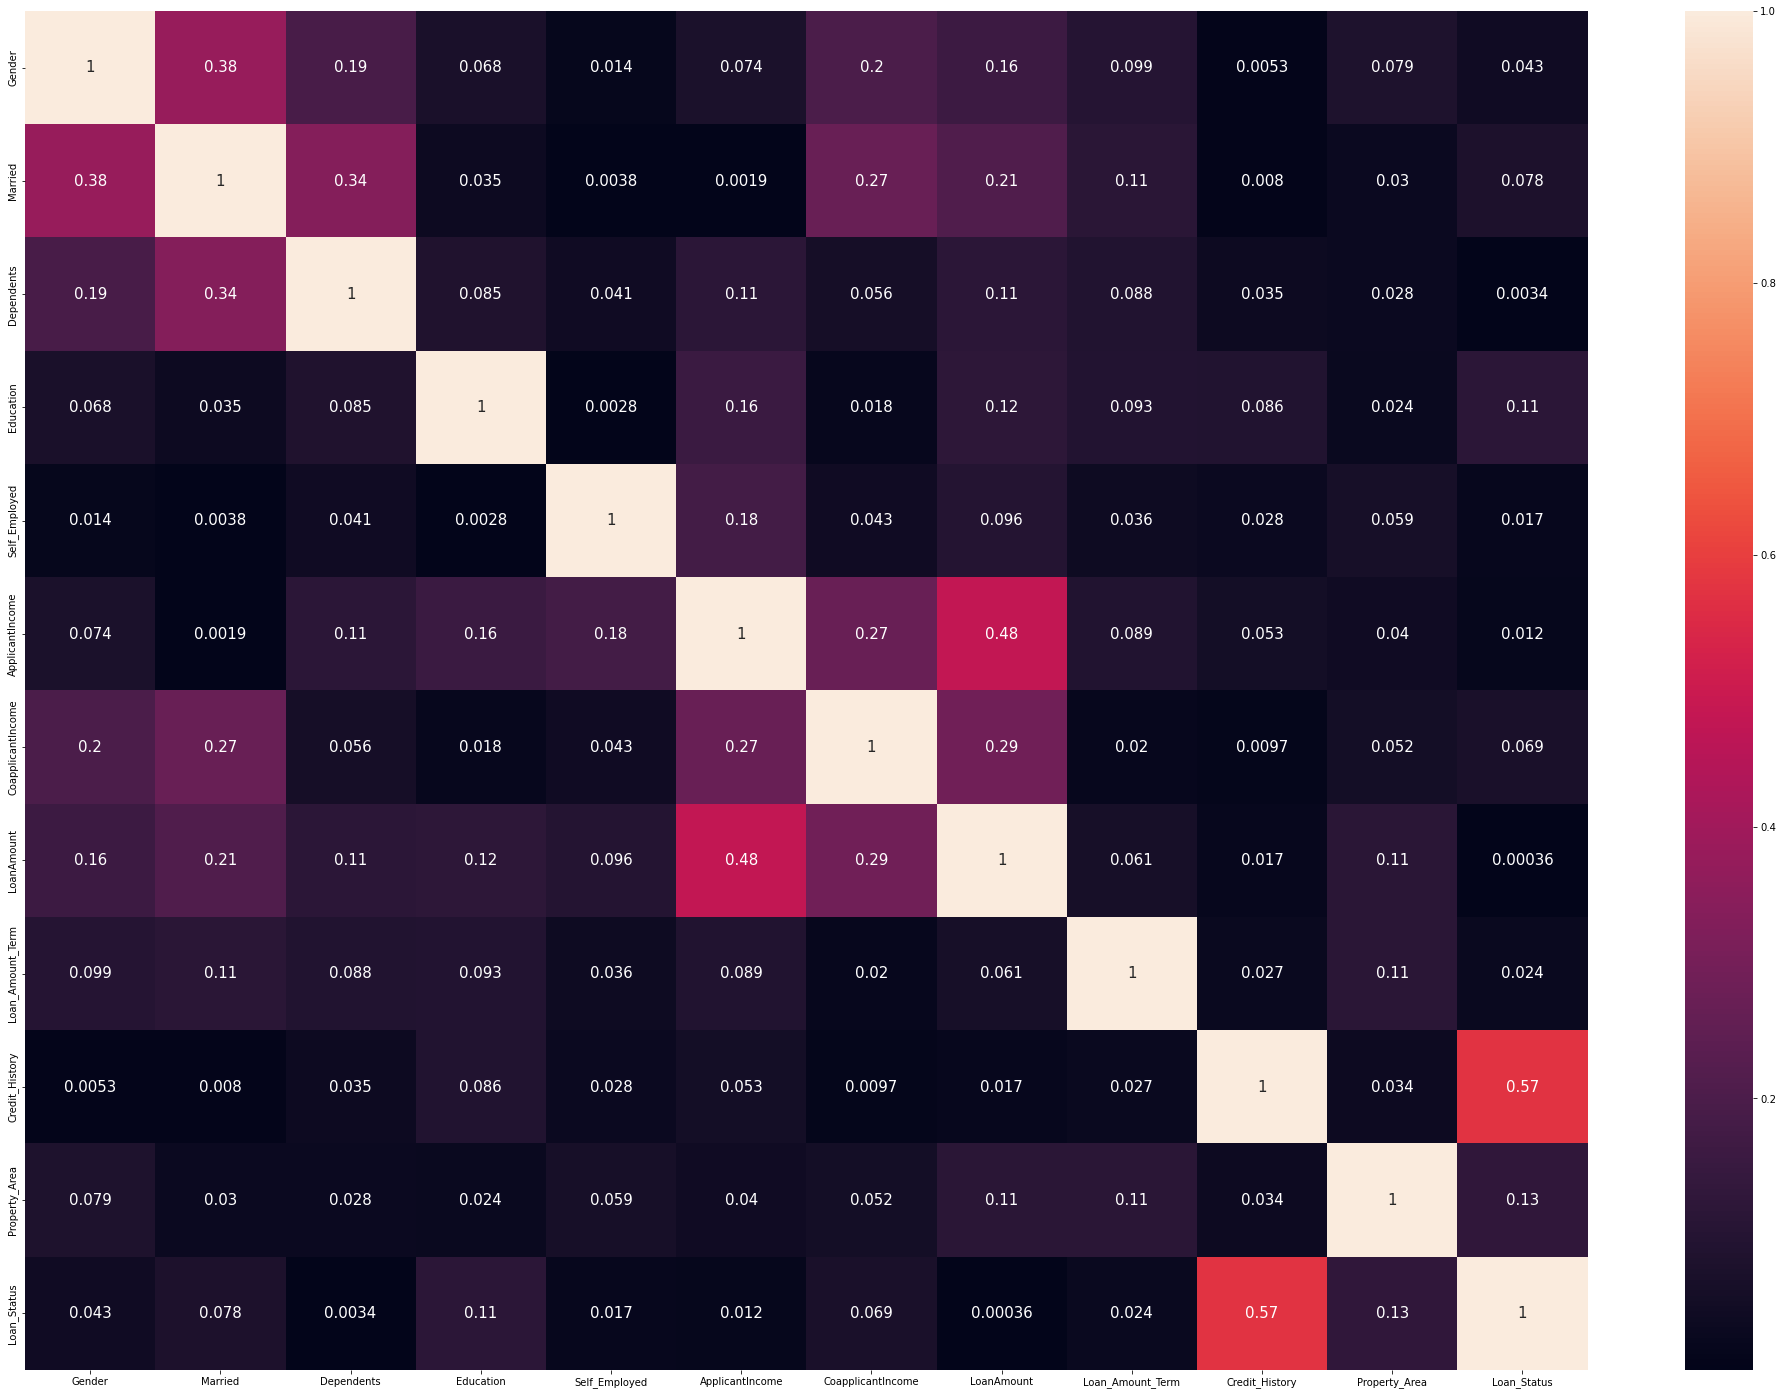

In [45]:
df_corr = data.corr().abs()

plt.figure(figsize =(35, 25))
sns.heatmap(df_corr, annot = True, annot_kws={'size' :15})
plt.show()

<AxesSubplot:>

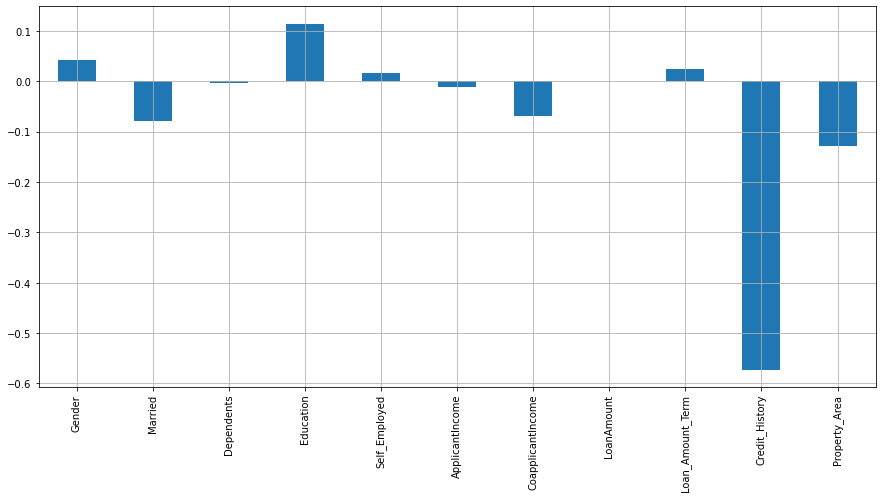

In [46]:
data.drop('Loan_Status',axis =1).corrwith(data.Loan_Status).plot(kind = 'bar', grid=True, figsize = (15,7))

In [62]:
# no chance of dropping any feature

Balanceing dataset

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

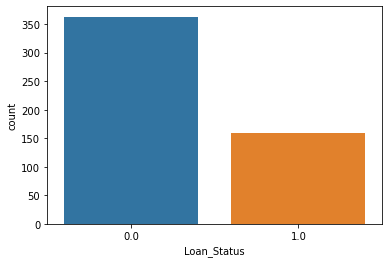

In [47]:
sns.countplot(data['Loan_Status'])

In [48]:
# Need to balance the data set

In [49]:
x = data.drop(columns = ['Loan_Status'],axis =1)
y = data.Loan_Status

In [50]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [51]:
balanced_x,balanced_y = smt.fit_resample(x, y)

In [52]:
balanced_x.shape, balanced_y.shape

((726, 11), (726,))

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

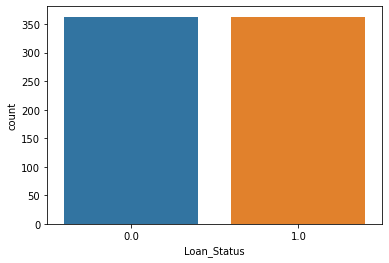

In [53]:
sns.countplot(balanced_y)

In [54]:
# Dataset has been balanced now

#Scaling the Dataset

In [55]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
balanced_x_scaled = scale.fit_transform(balanced_x)

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(balanced_x_scaled,i) for i in range(balanced_x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,1.241983,Gender
1,1.435992,Married
2,1.215754,Dependents
3,1.080943,Education
4,1.039037,Self_Employed
5,1.797099,ApplicantIncome
6,1.633699,CoapplicantIncome
7,1.867035,LoanAmount
8,1.103672,Loan_Amount_Term
9,1.026946,Credit_History


In [57]:
# all values are less than 5. SO there is no multicollinearity exists

In [58]:
from scipy.stats import skew

In [59]:
# Consider skew map only for continuous feature.

Gender
1.5127755636787494


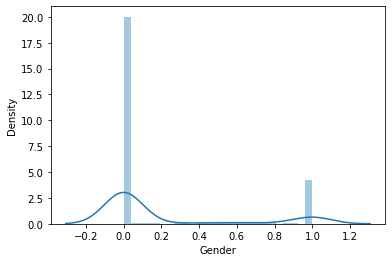

Married
-0.5409867978795888


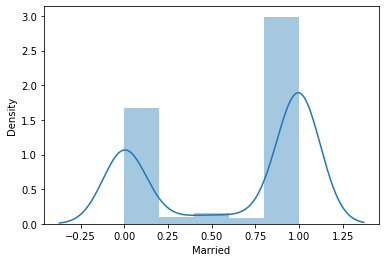

Dependents
0.9966778192903628


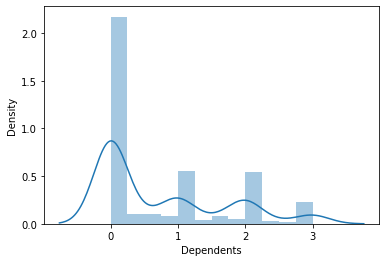

Education
1.0774386253568389


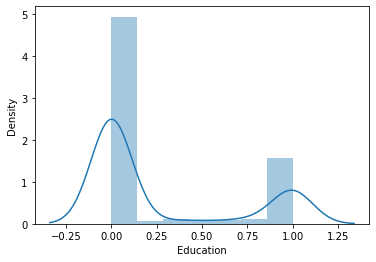

Self_Employed
2.3308840760336222


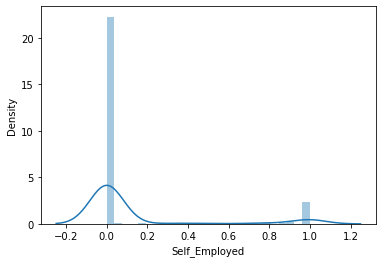

ApplicantIncome
1.20456443195729


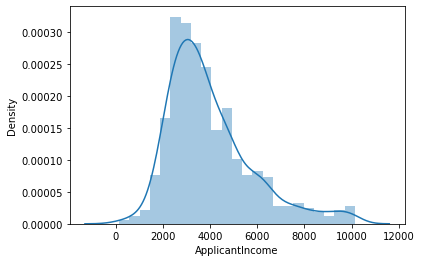

CoapplicantIncome
0.8640323522234066


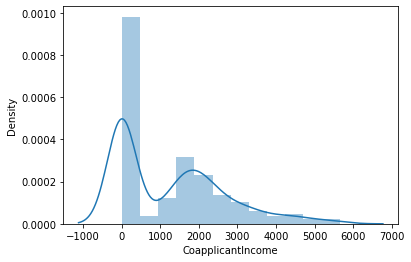

LoanAmount
0.5439616268388999


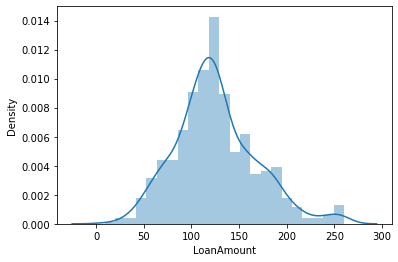

Loan_Amount_Term
-1.884988586632967


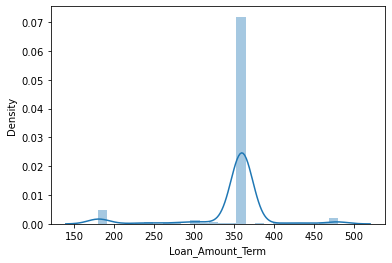

Credit_History
-1.3078523332030432


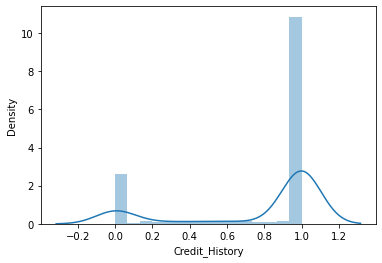

Property_Area
-0.04451666381637346


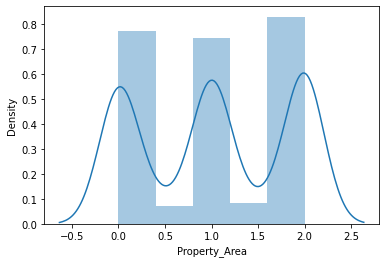

In [65]:
for col in balanced_x:
    print(col)
    print(skew(balanced_x[col]))
    
    plt.figure()
    sns.distplot(balanced_x[col])
    plt.show()

In [61]:
# No much skewnwss exists. So no need to treat skewness here

#selection of Random state

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import  LogisticRegression

In [67]:
lg = LogisticRegression()

In [68]:
for i in range(0,101):
    x_train,x_test,y_train,y_test = train_test_split(balanced_x_scaled,balanced_y,train_size = 0.75,random_state = i)
    lg.fit(x_train, y_train)
    predict_train = lg.predict(x_train)
    predict_test = lg.predict(x_test)
    print(f"At random state {i}, the train set accuracy is ",{accuracy_score(y_train,predict_train)})
    print(f"At random state {i}, the test set accuracy is ",{accuracy_score(y_test,predict_test)})

At random state 0, the train set accuracy is  {0.7444852941176471}
At random state 0, the test set accuracy is  {0.7197802197802198}
At random state 1, the train set accuracy is  {0.7628676470588235}
At random state 1, the test set accuracy is  {0.7472527472527473}
At random state 2, the train set accuracy is  {0.7555147058823529}
At random state 2, the test set accuracy is  {0.7252747252747253}
At random state 3, the train set accuracy is  {0.75}
At random state 3, the test set accuracy is  {0.8131868131868132}
At random state 4, the train set accuracy is  {0.7775735294117647}
At random state 4, the test set accuracy is  {0.7527472527472527}
At random state 5, the train set accuracy is  {0.7444852941176471}
At random state 5, the test set accuracy is  {0.7582417582417582}
At random state 6, the train set accuracy is  {0.7702205882352942}
At random state 6, the test set accuracy is  {0.7087912087912088}
At random state 7, the train set accuracy is  {0.7738970588235294}
At random state 

In [72]:
# at random state 90, the model perfroms well.So random state is 90
x_train,x_test,y_train,y_test = train_test_split(balanced_x,balanced_y,train_size = 0.75,random_state = 90)
lg.fit(x_train, y_train)
predict_train = lg.predict(x_train)
predict_test = lg.predict(x_test)
print(f"The train set accuracy is ",{accuracy_score(y_train,predict_train)})
print(f"The test set accuracy is ",{accuracy_score(y_test,predict_test)})

The train set accuracy is  {0.7444852941176471}
The test set accuracy is  {0.7307692307692307}


In [73]:
#Model

In [74]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    clf.fit(x_train, y_train)
    if train:
        train_pred = clf.predict(x_train)
        print("\n===================Train Results============")
        print('Accuracy:', accuracy_score(y_train, train_pred)*100,'% \n')
        print("\n Test Classification Report -\n", classification_report(y_train, train_pred, digits = 2))
        
    elif train == False:
        test_pred = clf.predict(x_test)
        print("\n===================Test Results============")
        print('Accuracy:', accuracy_score(y_test, test_pred)*100,'%\n')
        print("\n Test Classification Report -\n", classification_report(y_test, test_pred, digits = 2))

In [75]:
metric_score(lg,x_train,x_test,y_train,y_test, train = True)
metric_score(lg,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 74.44852941176471 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.70      0.85      0.77       271
         1.0       0.81      0.64      0.72       273

    accuracy                           0.74       544
   macro avg       0.76      0.74      0.74       544
weighted avg       0.76      0.74      0.74       544


===================Test Results============
Accuracy: 73.07692307692307 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.68      0.87      0.77        92
         1.0       0.82      0.59      0.68        90

    accuracy                           0.73       182
   macro avg       0.75      0.73      0.72       182
weighted avg       0.75      0.73      0.73       182



In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [77]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
gbr = GradientBoostingClassifier()

In [ ]:
# Random Forest

In [83]:
metric_score(rf,x_train,x_test,y_train,y_test, train = True)
metric_score(rf,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 100.0 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       271
         1.0       1.00      1.00      1.00       273

    accuracy                           1.00       544
   macro avg       1.00      1.00      1.00       544
weighted avg       1.00      1.00      1.00       544


===================Test Results============
Accuracy: 84.61538461538461 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.78      0.97      0.86        92
         1.0       0.96      0.72      0.82        90

    accuracy                           0.85       182
   macro avg       0.87      0.84      0.84       182
weighted avg       0.87      0.85      0.84       182



In [84]:
# Decision Tree
metric_score(dt,x_train,x_test,y_train,y_test, train = True)
metric_score(dt,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 100.0 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       271
         1.0       1.00      1.00      1.00       273

    accuracy                           1.00       544
   macro avg       1.00      1.00      1.00       544
weighted avg       1.00      1.00      1.00       544


===================Test Results============
Accuracy: 79.67032967032966 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.79      0.82      0.80        92
         1.0       0.80      0.78      0.79        90

    accuracy                           0.80       182
   macro avg       0.80      0.80      0.80       182
weighted avg       0.80      0.80      0.80       182



In [85]:
#knn
metric_score(knn,x_train,x_test,y_train,y_test, train = True)
metric_score(knn,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 74.26470588235294 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.76      0.70      0.73       271
         1.0       0.73      0.78      0.75       273

    accuracy                           0.74       544
   macro avg       0.74      0.74      0.74       544
weighted avg       0.74      0.74      0.74       544


===================Test Results============
Accuracy: 67.03296703296702 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.70      0.62      0.66        92
         1.0       0.65      0.72      0.68        90

    accuracy                           0.67       182
   macro avg       0.67      0.67      0.67       182
weighted avg       0.67      0.67      0.67       182



In [86]:
# Gradient Boost 
metric_score(gbr,x_train,x_test,y_train,y_test, train = True)
metric_score(gbr,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 94.30147058823529 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       271
         1.0       0.99      0.90      0.94       273

    accuracy                           0.94       544
   macro avg       0.95      0.94      0.94       544
weighted avg       0.95      0.94      0.94       544


===================Test Results============
Accuracy: 84.61538461538461 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.79      0.96      0.86        92
         1.0       0.94      0.73      0.83        90

    accuracy                           0.85       182
   macro avg       0.86      0.84      0.84       182
weighted avg       0.86      0.85      0.84       182



# Cross Validation

In [88]:
from sklearn.model_selection import KFold,cross_val_score

In [94]:
cross_val_score(lg,balanced_x_scaled, balanced_y, cv = 5).mean()

0.7452338214454416

In [95]:
cross_val_score(rf,balanced_x_scaled, balanced_y, cv = 5).mean()

0.8638167217760981

In [96]:
cross_val_score(knn,balanced_x_scaled, balanced_y, cv = 5).mean()

0.7962116202172885

In [97]:
cross_val_score(dt,balanced_x_scaled, balanced_y, cv = 5).mean()

0.7880207841284836

In [98]:
cross_val_score(gbr,balanced_x_scaled, balanced_y, cv = 5).mean()

0.8307888521492679

In [105]:
# Gradient Boost Decision Tree gives the high accuracy SO this model has been selected as final model

# Hyperparameter Tuning

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
grid_param = {'max_depth' : range (4,8),
             'min_samples_split' : range (2,8,2),
             'learning_rate' : np.arange (0.1,0.5)}

In [106]:
grid = GridSearchCV(gbr, param_grid = grid_param)
grid.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [107]:
best = grid.best_params_
best

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 6}

In [108]:
grid_model = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 4, min_samples_split= 6)

In [109]:
grid_model.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=4, min_samples_split=6)

In [110]:
metric_score(grid_model,x_train,x_test,y_train,y_test, train = True)
metric_score(grid_model,x_train,x_test,y_train,y_test, train = False)


===================Train Results============
Accuracy: 97.97794117647058 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       271
         1.0       1.00      0.96      0.98       273

    accuracy                           0.98       544
   macro avg       0.98      0.98      0.98       544
weighted avg       0.98      0.98      0.98       544


===================Test Results============
Accuracy: 82.41758241758241 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.78      0.91      0.84        92
         1.0       0.89      0.73      0.80        90

    accuracy                           0.82       182
   macro avg       0.83      0.82      0.82       182
weighted avg       0.83      0.82      0.82       182



In [111]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

Text(0.5, 1.0, 'ROC AUC Plot')

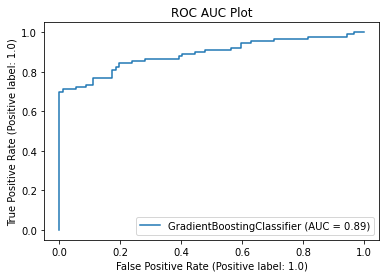

In [112]:
plot_roc_curve(grid_model,x_test,y_test)
plt.title('ROC AUC Plot')

Acheived ROC AUC = 89%

In [113]:
#saving the model

In [114]:
filename = 'Loan Status Prediction'
pickle.dump(grid_model,open(filename,'wb'))

In [115]:
saved_mod = pickle.load(open(filename,'rb'))

In [116]:
saved_mod.predict(x_test)

array([1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [117]:
y_test

713    1.0
563    1.0
680    1.0
261    1.0
590    1.0
      ... 
211    0.0
432    0.0
485    1.0
251    0.0
11     0.0
Name: Loan_Status, Length: 182, dtype: float64

In [118]:
#prediction is almost close to the actual

In [119]:
#End of Project